In [75]:
import os
import pickle

from source.source.path_config import REPOSITORY_ROOT
from source.source.data_utils import load_dict
from source.datasets.constants import DatasetName

from source.metrics.create_specific_risks import get_risk_approximation
from source.metrics.constants import GName

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = os.path.join(
    REPOSITORY_ROOT,
    "external_repos/pytorch_cifar10/checkpoints/resnet18/CENTRAL_extracted_information_for_notebook_combinations.pkl",
)

In [3]:
res = load_dict(filepath)

In [67]:
# T = 2.
T = 2.

In [68]:
res.keys()

dict_keys(['uq_results', 'embeddings_per_dataset', 'targets_per_dataset'])

In [69]:
ind_logits = res['embeddings_per_dataset']['CrossEntropy'][DatasetName.CIFAR10.value] / T
ood_logits = res['embeddings_per_dataset']['CrossEntropy'][DatasetName.CIFAR100.value] / T

In [70]:
from scipy.special import softmax

In [71]:
ind_probs = softmax(ind_logits, axis=-1)
ood_probs = softmax(ood_logits, axis=-1)

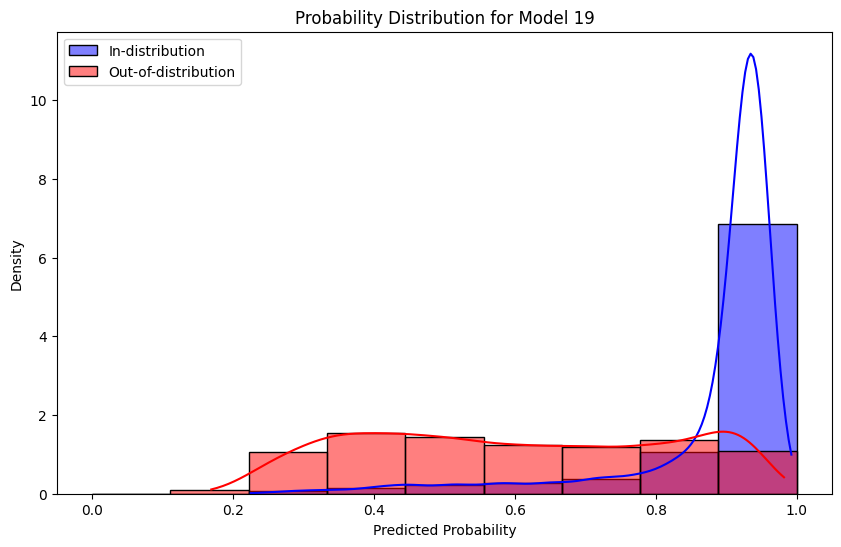

In [73]:
model_index = 19

in_probs_flat = ind_probs[model_index].max(-1).flatten()
out_probs_flat = ood_probs[model_index].max(-1).flatten()

# Step 4: Plot histograms
bins = np.linspace(start=0., stop=1., num=10)
plt.figure(figsize=(10,6))
sns.histplot(in_probs_flat, color='blue', label='In-distribution', kde=True, stat='density', bins=bins, alpha=0.5)
sns.histplot(out_probs_flat, color='red', label='Out-of-distribution', kde=True, stat='density', bins=bins, alpha=0.5)
plt.title(f'Probability Distribution for Model {model_index}')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
get_risk_approximation(
    g_name: GName.,
    risk_type: source.metrics.constants.RiskType,
    logits: numpy.ndarray,
    gt_approx: source.metrics.constants.ApproximationType,
    T: float = 1.0,
    probabilities: Optional[numpy.ndarray] = None,
    pred_approx: Optional[source.metrics.constants.ApproximationType] = None,
)

In [43]:
import numpy as np

In [44]:
ind_medians = np.median(ind_probs, axis=(0, 1))

In [45]:
ood_medians = np.median(ood_probs, axis=(0, 1))

In [20]:
ind_medians

array([7.9430465e-05, 7.1443545e-05, 8.5163520e-05, 8.8619403e-05,
       7.8317302e-05, 7.6423239e-05, 7.6188684e-05, 7.4238138e-05,
       7.5391741e-05, 7.6094453e-05], dtype=float32)

In [21]:
ood_medians

array([0.00207027, 0.00139642, 0.00636799, 0.01002525, 0.0023474 ,
       0.00180358, 0.00328116, 0.00160779, 0.00207039, 0.00224724],
      dtype=float32)